## PCA
Based on Andrew Ng's lectures

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

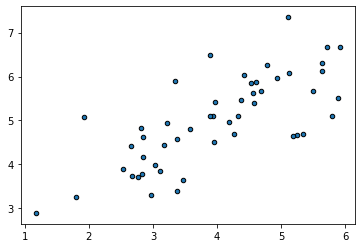

In [234]:
rawdata = sio.loadmat('data1ex7')
X = rawdata['X']
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=20)

In [235]:
def PCA(Xn):
    Covariance = np.cov(Xn.T)
    u, s, vh = np.linalg.svd(Covariance)
    S = np.diag(s)
#     print(u,s,vh)
    return u,S

def ProjectData(X,U,K):
    Z = X @ U[:,0:K]
    return Z

def ReconstructData(Z,U,K):
    X = Z @ U[:,0:K].T
    return X

[-0.70710678  0.70710678]


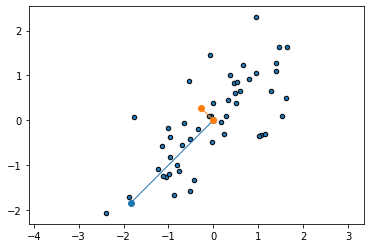

In [236]:
mu = np.mean(X,axis=0)
sig = np.std(X,axis=0,ddof=1)
Xnorm = ((X - mu) / sig)

U,S = PCA(Xnorm)
print(U[:,1])

P1 = 1.5*S[0,0]*U[:,0]
P2 = 1.5*S[1,1]*U[:,1]
plt.axis('equal')
plt.scatter(Xnorm[:, 0], Xnorm[:, 1], edgecolor='k', s=20)
plt.plot([0,P1[0]],[0,P1[1]],linewidth=1, marker = 'o')
plt.plot([0,P2[0]],[0,P2[1]],linewidth=1, marker = 'o')


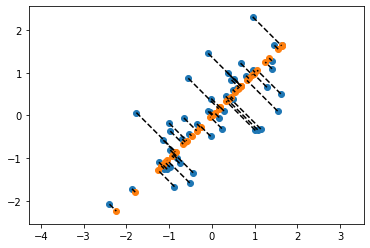

In [237]:
K = 1
Z = ProjectData(Xnorm,U,K)
XRec = ReconstructData(Z,U,K)
plt.axis('equal')
plt.scatter(Xnorm[:,0],Xnorm[:,1])
plt.scatter(XRec[:,0],XRec[:,1])
for i in range(0,Xnorm.shape[0]):
    plt.plot([Xnorm[i,0],XRec[i,0]],[Xnorm[i,1],XRec[i,1]],'k--')

## PCA in faces

(1024, 1024)


<Figure size 720x720 with 0 Axes>

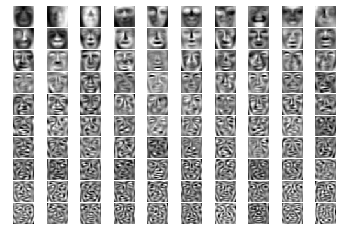

In [239]:
def PlotFaces(X,ImgSz):
#     ImgSz = (numpix,numpix)
    plt.figure(figsize=(10, 10))
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.05, wspace=0.025)
    for i in range(1, 101):
        randPlot = np.random.randint(1, 5000)
        ax = fig.add_subplot(10, 10, i)
        plt.axis('equal')
        plt.imshow(X[i-1,:].reshape(ImgSz,order='F'), cmap='gray', extent=[0, 1, 0, 1])
        ax.axis('off')

class TrainingSet:
    def __init__(self, dataset):
        # dataset is string with .mat raw data ('data1ex4')
        # WeightsData: string .mat file w/ already trained Thetas ('weights-ex4')
        self.rawdata = sio.loadmat(dataset)
        self.X = self.rawdata['X']

    def Normalize(self):
        mu = np.mean(self.X,axis=0)
        sig = np.std(self.X,axis=0,ddof=1)
        Xnorm = ((self.X - mu) / sig)
        return mu,sig,Xnorm 

TrainingData = TrainingSet('faces_ex7')

mu,sig,Xnorm = TrainingData.Normalize()

U,S = PCA(Xnorm)
print(U.shape)
# Plot 100 first principal components Images
# Data Each principal component is now on the columns of U
PlotFaces(U.T,(32,32))

In [245]:
# Project the data in the first 100 eigenvectors
K = 100
Zf = ProjectData(Xnorm,U,K)
print("Z has now shape:",Zf.shape)

Z has now shape: (5000, 100)


(5000, 1024)


<Figure size 720x720 with 0 Axes>

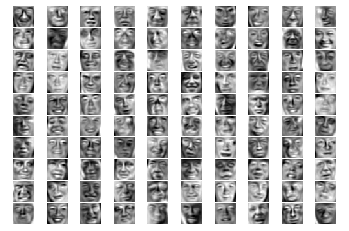

In [244]:
# Reconstruct the data using only the first 100 components
XRec = ReconstructData(Zf,U,K)
print(XRec.shape)
# Plot 100 Reconstructed data
PlotFaces(XRec,(32,32))